C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


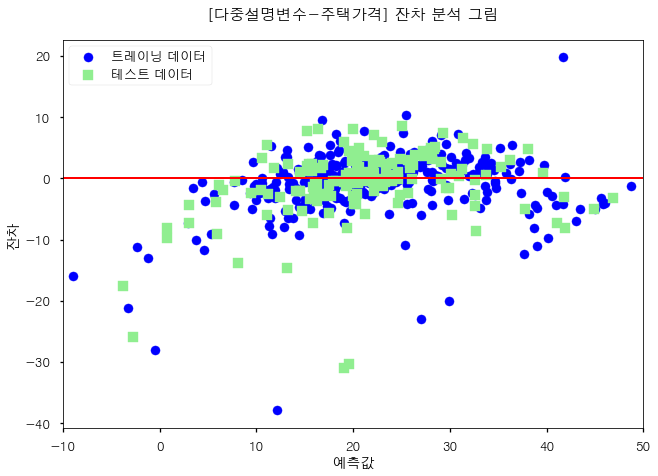

In [9]:
# 보스턴 외곽 지역 주택정보 14개 범주에서 처음 13개는 설명변수로 하고
# 주택 가격 MEDV는 반응 값으로 하여 잔차를 분석하는 코드

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RANSACRegressor

style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 주택 정보에서 마지막 열(MEDV)를 제외한 열의 값들을 X로 둠
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 두 알고리즘을 스왑하여 적합도를 비교해볼 수 있음
# LinearRegression() : 테스트 데이터의 MSE가 트레이닝 데이터의 MSE에 비해 크게 나온다.
#                      즉, 회귀 모델이 오버피팅 되었음을 의미함.
#                      결정 계수의 값을 보더라도 트레이닝 데이터의 값에 비해 테스트 데이터에 대한 결정 계수값이 다소 작게 나온다.
# RANSACRegressor : inlier(내좌층)에 속하는 데이터 집합으로 회귀 분석을 수행하는 알고리즘
#                   적합도는 LR보다 낮게 나온다. 물론 RANSAC의 residual_threshold 값을
#                   적절하게 조절하면 더 나은 결과를 보일 수도 있다.

# lr = LinearRegression()

lr = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50,
                        residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                        residual_threshold=5.0, random_state=0)

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='o', label='트레이닝 데이터')
plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', label='테스트 데이터')

plt.xlabel('예측값')
plt.ylabel('잔차')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.title('[다중설명변수-주택가격] 잔차 분석 그림\n')
plt.legend(loc=2)
plt.show()


In [10]:
# 결정 계수 R2
# R2 = 1 - MSE/분산
# 평균 제곱 오차(Mean Square Error; MSE)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('MSE - 트레이닝 데이터: %.2f, 테스트 데이터: %.2f' %(mse_train, mse_test))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2 - 트레이닝 데이터: %.2f, 테스트 데이터: %.2f' %(r2_train, r2_test))

MSE - 트레이닝 데이터: 24.51, 테스트 데이터: 35.48
R2 - 트레이닝 데이터: 0.71, 테스트 데이터: 0.57
